# 1. Setup & Dependencies 

In [9]:
pip install opencv-python-headless opencv-python matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.0
executing                    2.0.1

#### import packages and modules

In [2]:
import os
import cv2
import imghdr
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.api._v2.keras as keras

In [11]:
data_dir = 'archive\pizza_not_pizza'

In [12]:
image_type = ['jpeg','jpg','bmp','png']

# 2. Remove Dogy Images

In [13]:
for image_class in os.listdir(data_dir):  # image_class : happy sad (folder)
    for image in os.listdir(os.path.join(data_dir,image_class)): # /data/happy/(filepath)
        image_path = os.path.join(data_dir,image_class,image) # /data/happy.imag1.png(filepath)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_type:
                print('Image not in the ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

# 3. Load Data

In [14]:
# Load image dataset using Keras
data = keras.utils.image_dataset_from_directory(data_dir)

Found 1966 files belonging to 2 classes.


In [15]:
#Iterate over the data
data_iterator = data.as_numpy_iterator()

In [16]:
#Segments of the data
segment = data_iterator.next()

In [17]:
print(segment)

(array([[[[230.86914, 232.86914, 227.86914],
         [233.10742, 235.10742, 230.10742],
         [235.8457 , 237.8457 , 232.8457 ],
         ...,
         [230.38477, 237.8457 , 245.61523],
         [230.5    , 237.5    , 245.5    ],
         [230.5    , 237.5    , 245.5    ]],

        [[233.2461 , 235.2461 , 230.2461 ],
         [235.10742, 237.10742, 232.10742],
         [237.73047, 239.73047, 234.73047],
         ...,
         [229.76953, 237.23047, 245.     ],
         [230.     , 237.     , 245.     ],
         [229.2461 , 236.2461 , 244.2461 ]],

        [[235.2461 , 237.2461 , 232.2461 ],
         [236.73828, 238.73828, 233.73828],
         [239.23047, 241.23047, 236.6914 ],
         ...,
         [230.76953, 238.23047, 246.     ],
         [231.     , 238.     , 246.     ],
         [230.62305, 237.62305, 245.62305]],

        ...,

        [[215.7461 , 221.7461 , 221.7461 ],
         [217.60742, 223.60742, 223.60742],
         [219.     , 225.     , 225.     ],
         ...,

In [18]:
print(segment[0].shape)

(32, 256, 256, 3)


In [19]:
print(segment[1].shape)

(32,)


In [20]:
print(len(segment[1]))

32


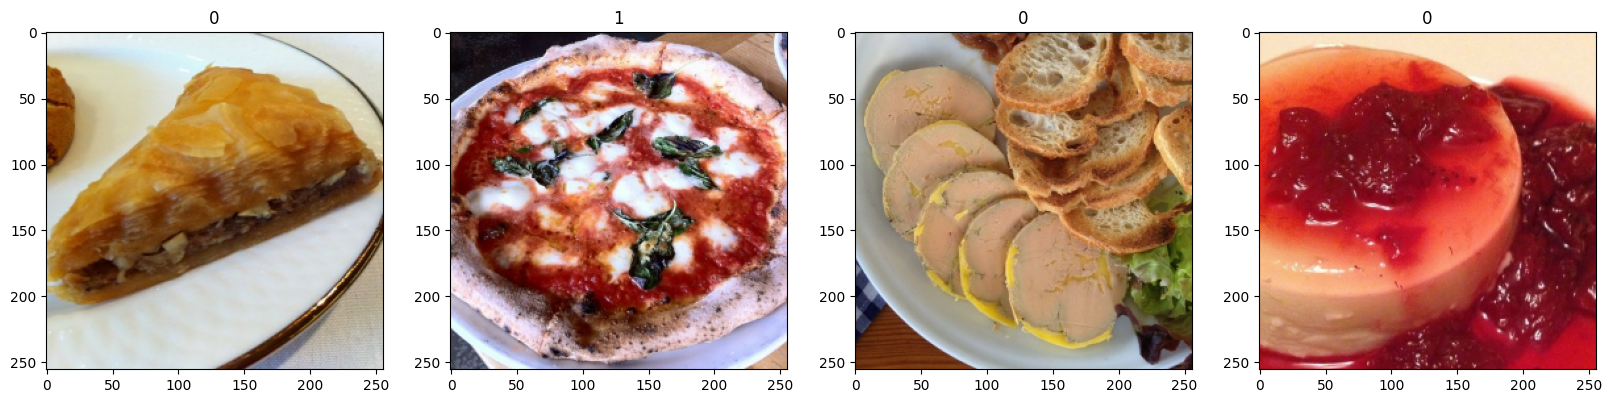

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(segment[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(segment[1][idx])

# 4. Scale the Data

In [22]:
print(segment[0][0])

[[[230.86914 232.86914 227.86914]
  [233.10742 235.10742 230.10742]
  [235.8457  237.8457  232.8457 ]
  ...
  [230.38477 237.8457  245.61523]
  [230.5     237.5     245.5    ]
  [230.5     237.5     245.5    ]]

 [[233.2461  235.2461  230.2461 ]
  [235.10742 237.10742 232.10742]
  [237.73047 239.73047 234.73047]
  ...
  [229.76953 237.23047 245.     ]
  [230.      237.      245.     ]
  [229.2461  236.2461  244.2461 ]]

 [[235.2461  237.2461  232.2461 ]
  [236.73828 238.73828 233.73828]
  [239.23047 241.23047 236.6914 ]
  ...
  [230.76953 238.23047 246.     ]
  [231.      238.      246.     ]
  [230.62305 237.62305 245.62305]]

 ...

 [[215.7461  221.7461  221.7461 ]
  [217.60742 223.60742 223.60742]
  [219.      225.      225.     ]
  ...
  [215.61523 214.07617 215.30664]
  [211.26172 209.52344 209.73828]
  [217.27734 216.27734 214.27734]]

 [[214.12305 223.12305 220.12305]
  [214.86914 223.86914 220.86914]
  [216.3457  225.3457  222.3457 ]
  ...
  [210.92383 209.38477 210.61523]
  [2

In [23]:
data = data.map(lambda x,y: (x/225,y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[0.6311111 , 0.58666664, 0.5777778 ],
          [0.5966667 , 0.55222225, 0.54333335],
          [0.5744445 , 0.53      , 0.52111113],
          ...,
          [0.8011111 , 0.75222224, 0.72555554],
          [0.77666664, 0.7366667 , 0.70555556],
          [0.75333333, 0.7133333 , 0.68222225]],
 
         [[0.76222223, 0.7222222 , 0.7       ],
          [0.75333333, 0.7133333 , 0.6911111 ],
          [0.73      , 0.69      , 0.6677778 ],
          ...,
          [0.79      , 0.75      , 0.7277778 ],
          [0.78444445, 0.74444443, 0.7222222 ],
          [0.72      , 0.68      , 0.6577778 ]],
 
         [[0.65      , 0.61      , 0.5877778 ],
          [0.70666665, 0.6666667 , 0.64444447],
          [0.7222222 , 0.68222225, 0.66      ],
          ...,
          [0.74222225, 0.70666665, 0.6933333 ],
          [0.7311111 , 0.69555557, 0.68222225],
          [0.6566667 , 0.6166667 , 0.60555553]],
 
         ...,
 
         [[0.58      , 0.52555555, 0.46222222],
          [0.57555

# 5. Split Data into Train, Evaluate, Test

In [25]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 6. Deep Learning Model

In [27]:
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout

#### Initiate model

In [28]:
model = Sequential()

#### Enhance Performance

In [29]:
initilizer = tf.keras.initializers.HeNormal() 
rate_dropout = 0.3
regularizer = tf.keras.regularizers.L1()
loss = tf.keras.losses.BinaryCrossentropy()
optimizers = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
batch_size = 20

#### Initiate Layers

In [45]:
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


early_stopping_monitor = EarlyStopping(patience=2)

model.compile(optimizer='adam',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])

hist = model.fit(train, epochs=10, callbacks=[early_stopping_monitor], validation_data=val)

Epoch 1/10
43/43 [==============================] - 6s 128ms/step - loss: 0.6889 - accuracy: 0.5291 - val_loss: 0.6660 - val_accuracy: 0.5729
Epoch 2/10
43/43 [==============================] - 6s 130ms/step - loss: 0.6466 - accuracy: 0.6352 - val_loss: 0.6505 - val_accuracy: 0.6328
Epoch 3/10
43/43 [==============================] - 6s 129ms/step - loss: 0.6379 - accuracy: 0.6366 - val_loss: 0.6359 - val_accuracy: 0.6458
Epoch 4/10
43/43 [==============================] - 6s 128ms/step - loss: 0.6121 - accuracy: 0.6701 - val_loss: 0.5865 - val_accuracy: 0.6797
Epoch 5/10
43/43 [==============================] - 5s 123ms/step - loss: 0.5609 - accuracy: 0.7137 - val_loss: 0.5606 - val_accuracy: 0.7292
Epoch 6/10
43/43 [==============================] - 5s 116ms/step - loss: 0.5175 - accuracy: 0.7442 - val_loss: 0.5328 - val_accuracy: 0.7318
Epoch 7/10
43/43 [==============================] - 5s 114ms/step - loss: 0.5348 - accuracy: 0.7275 - val_loss: 0.5361 - val_accuracy: 0.7656
Epoch 

#### Train Model

# 7. Plot Performance

#### Loss function graph

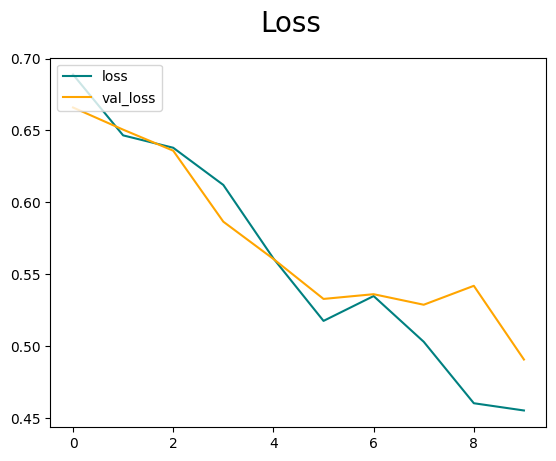

In [46]:
fig = plt. figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### Accuracy Graph

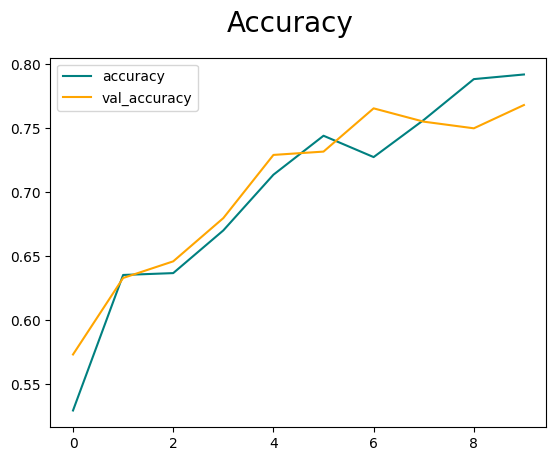

In [47]:
fig = plt. figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 8. Evaluate

#### Method 1

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X,y = batch
    pred = model.predict(X)
    pre.update_state(y,pred)
    re.update_state(y,pred)
    acc.update_state(y,pred)

print(pre.result(),re.result(),acc.result())

1/1 [==============================] - 0s 39ms/step
tf.Tensor(0.8145161, shape=(), dtype=float32) tf.Tensor(0.8559322, shape=(), dtype=float32) tf.Tensor(0.7916667, shape=(), dtype=float32)


#### Method 2

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

y_pred = model.predict(val)
y_pred = np.where(y_pred> 0.5,1,0)
y_test = tf.concat([y for x,y in val], axis = 0)

12/12 [==============================] - 2s 45ms/step


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.39      0.42       186
           1       0.50      0.58      0.54       198

    accuracy                           0.48       384
   macro avg       0.48      0.48      0.48       384
weighted avg       0.48      0.48      0.48       384



#### Method 3

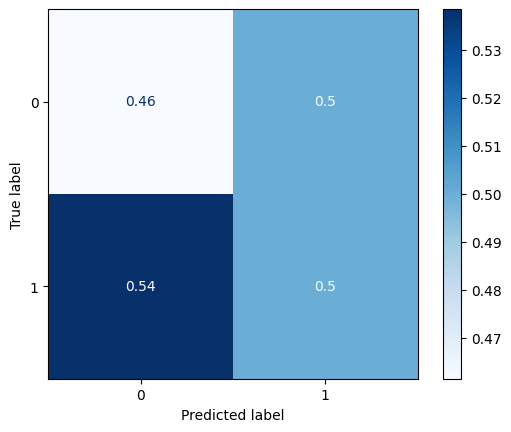

In [63]:
cm = confusion_matrix(y_test,y_pred, normalize='pred')
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap=plt.cm.Blues)
plt.show()

 # 9. Test Deploy Model

In [32]:
import cv2

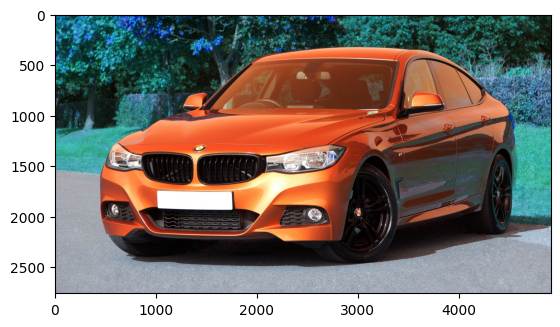

In [56]:
img = cv2.imread('pexels-photo-170811-1817538653.jpeg')
plt.imshow(img)
plt.show()

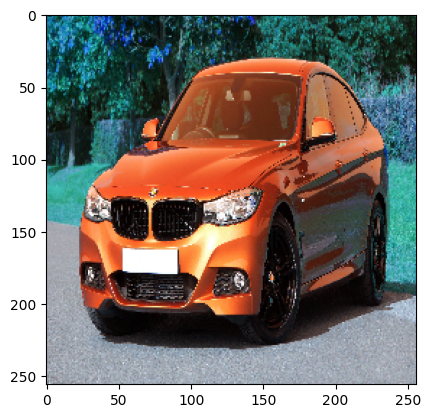

In [57]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)

1/1 [==============================] - 0s 21ms/step


[[0.1744902]]


In [59]:
if y_pred > 0.5:
    print('Pizza')
else:
    print('not pizza')

not pizza


1/1 [==============================] - 0s 18ms/step
[[0.89895034]]
Pizza


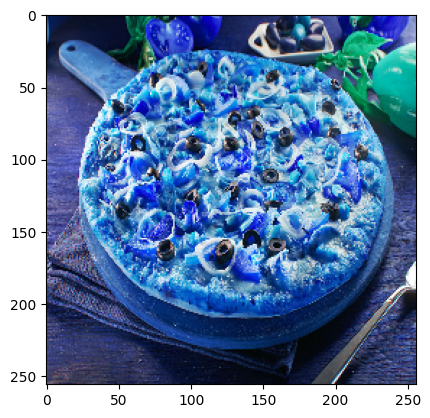

In [64]:
img1 = cv2.imread('Pizza-512287103.jpg')
resize = tf.image.resize(img1,(256,256))
plt.imshow(resize.numpy().astype(int))
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)
if y_pred > 0.5:
    print('Pizza')
else:
    print('not pizza')

1/1 [==============================] - 0s 18ms/step
[[0.24662651]]
not pizza


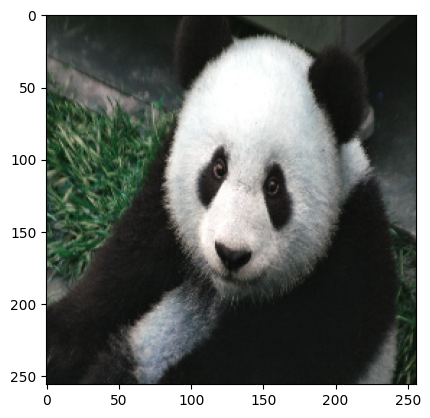

In [65]:
img1 = cv2.imread('Panda_Cub_from_Wolong,_Sichuan,_China-2845451788.JPG')
resize = tf.image.resize(img1,(256,256))
plt.imshow(resize.numpy().astype(int))
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)
if y_pred > 0.5:
    print('Pizza')
else:
    print('not pizza')

1/1 [==============================] - 0s 19ms/step
[[0.8187961]]
Pizza


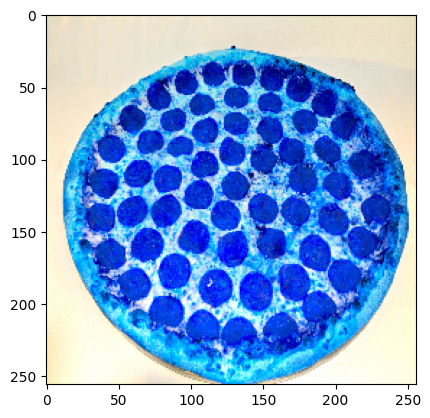

In [66]:
img1 = cv2.imread('Pepperoni-Pizza-2-Romanellis-Pizza-and-Italian-Eatery-Madison-NJ-07940-4217666131.jpg')
resize = tf.image.resize(img1,(256,256))
plt.imshow(resize.numpy().astype(int))
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)
if y_pred > 0.5:
    print('Pizza')
else:
    print('not pizza')

1/1 [==============================] - 0s 17ms/step
[[0.43313175]]
not pizza


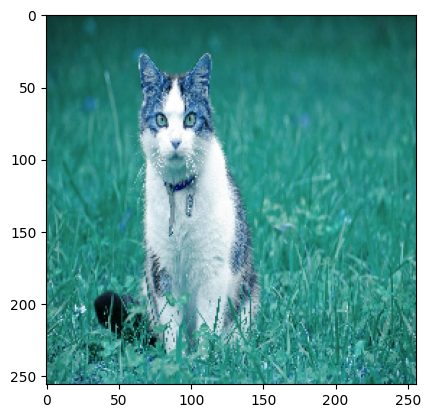

In [67]:
img1 = cv2.imread('2017-09-26-07-36-06-1291159196.jpg')
resize = tf.image.resize(img1,(256,256))
plt.imshow(resize.numpy().astype(int))
y_pred = model.predict(np.expand_dims(resize/255,0))
print(y_pred)
if y_pred > 0.5:
    print('Pizza')
else:
    print('not pizza')

1/1 [==============================] - 0s 18ms/step


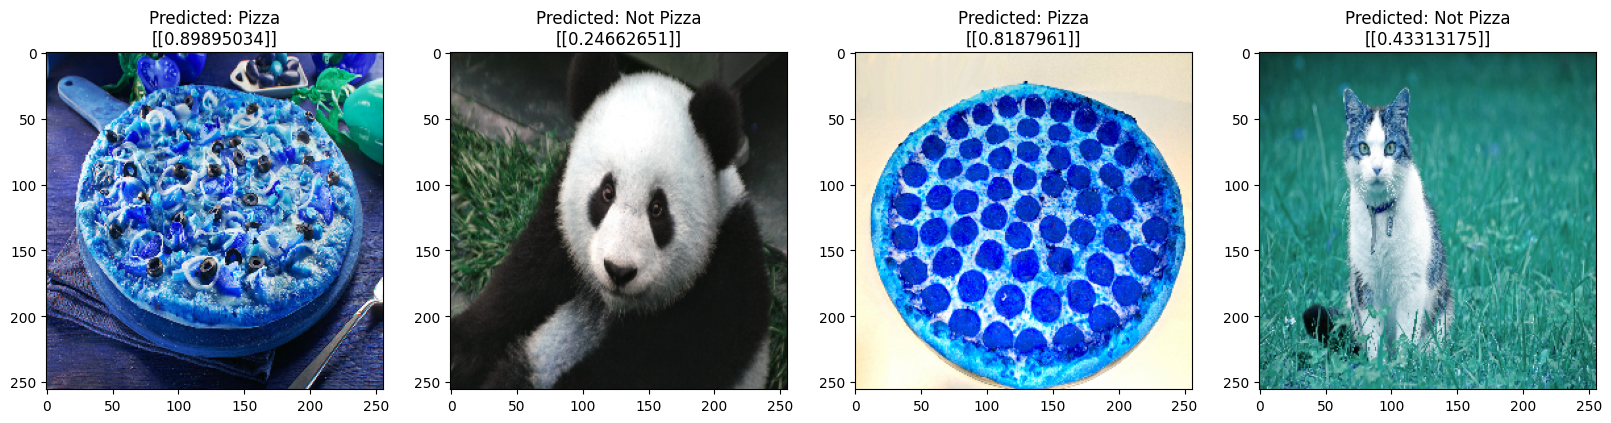

In [69]:
filename = ['Pizza-512287103.jpg','Panda_Cub_from_Wolong,_Sichuan,_China-2845451788.JPG','Pepperoni-Pizza-2-Romanellis-Pizza-and-Italian-Eatery-Madison-NJ-07940-4217666131.jpg','2017-09-26-07-36-06-1291159196.jpg']
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for i, img in enumerate(filename):
    img = cv2.imread(img)
    # plt.imshow(img)
    # plt.show()
    resize = tf.image.resize(img, (256,256))
    # plt.imshow(resize.numpy().astype(int))
    # plt.show()
    y_pred = model.predict(np.expand_dims(resize/255,0))
    ax[i].imshow(resize.numpy().astype(int))
    if y_pred > 0.5:
        ax[i].title.set_text(f'Predicted: Pizza\n{y_pred}')
    else:
        ax[i].title.set_text(f'Predicted: Not Pizza\n{y_pred}')

### Save Model

In [70]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','classify_v1.h5'))

In [38]:
import numpy as np

# Create a 4D array filled with zeros
zero_array = np.zeros((32, 5, 5, 3))

# Print the content of the array
print(zero_array)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [